In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import pandas as pd
from sklearn.model_selection import train_test_split


In [2]:
# prompt: load real.csv and replace event 4 with 3 and remove Commentary column

import pandas as pd
import numpy as np
# Load the CSV file
df = pd.read_csv('base_train.csv')

# Replace event 4 with 3
df['Event'] = df['Event'].replace(4, 3)

df = df[df['Event'] != 2]

In [3]:
from sklearn.metrics import  accuracy_score

In [4]:
# Replace event 4 with 3
df['Event'] = df['Event'].replace(4, 2)

Let's start with #GRU

Epoch 1/65


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5461 - loss: 0.9258 - val_accuracy: 0.7740 - val_loss: 0.5514
Epoch 2/65
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7502 - loss: 0.5968 - val_accuracy: 0.7910 - val_loss: 0.5046
Epoch 3/65
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7712 - loss: 0.5537 - val_accuracy: 0.7968 - val_loss: 0.4915
Epoch 4/65
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7789 - loss: 0.5382 - val_accuracy: 0.8005 - val_loss: 0.4842
Epoch 5/65
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7816 - loss: 0.5362 - val_accuracy: 0.8010 - val_loss: 0.4793
Epoch 6/65
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7830 - loss: 0.5268 - val_accuracy: 0.8058 - val_loss: 0.4752
Epoch 7/65
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7868 - loss: 0.5148 - val_accuracy: 0.8043 - val_loss: 0.4728
Epoch 8/65
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7892 - loss: 0.5127 - val_accuracy: 0.8048 - val_

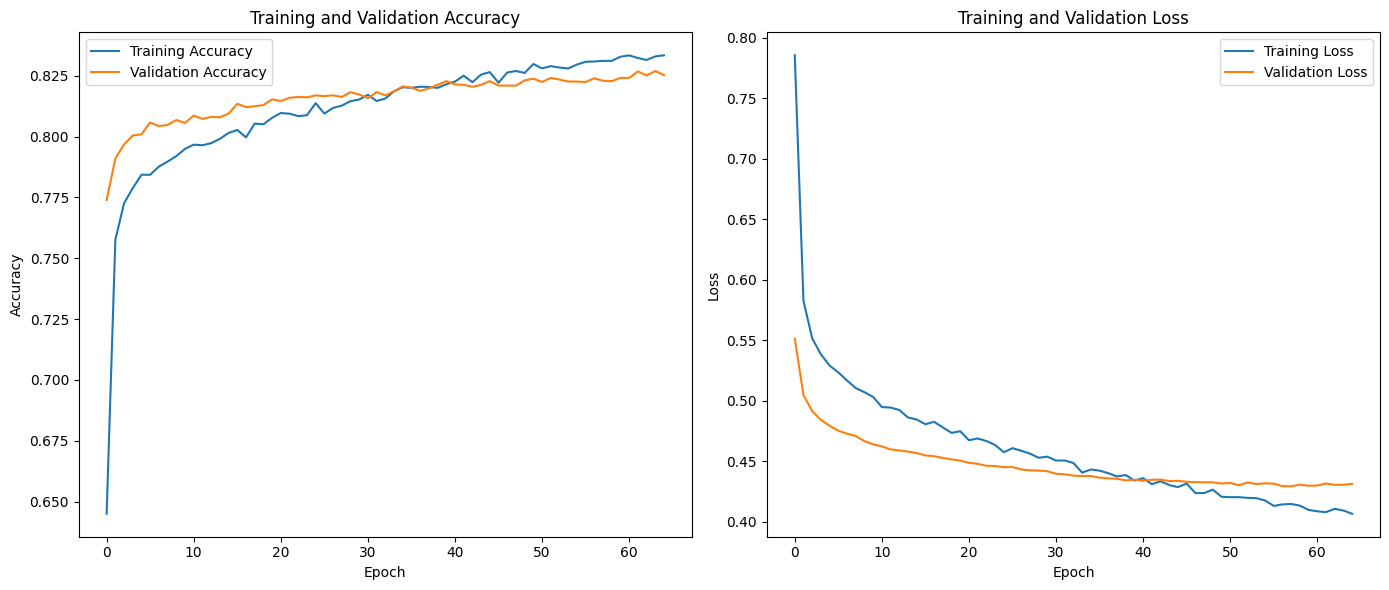

Test Set Accuracy: 0.8302
Test Set Loss: 0.4296


In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, GRU, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt

# # Load the dataset
# data = pd.read_csv('base_train.csv')  # Replace with the correct path to your file

# Extract the features (x columns) and the target (y column)
X = df.drop(columns=['Event']).values  # Assuming all columns except 'Event' are features
y = df['Event'].values  # This is the target column

# Encode the target variable (y) to ensure it's numeric
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape X for GRU input: [samples, timesteps, features]
# Assuming each row is a timestep in a sequence
X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Split the dataset into training (70%) and testing (30%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X_reshaped, y_encoded, test_size=0.20, random_state=42, stratify=y_encoded)

# Further split the temporary set into validation (50% of the temporary set) and testing (50%)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Build the Bidirectional GRU model with Dropout and RMSprop optimizer
model = Sequential()
model.add(Dropout(0.1))
model.add(Bidirectional(GRU(135, activation='tanh'), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.3))  # Dropout layer to reduce overfitting
model.add(Dense(70, activation='tanh'))
model.add(Dropout(0.2))  # Additional dropout layer
model.add(Dense(40, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(13, activation='tanh'))
model.add(Dropout(0.1))  # Additional dropout layer
model.add(Dense(len(np.unique(y_encoded)), activation='softmax'))  # Output layer for classification

# Compile the model with RMSprop optimizer
optimizer = RMSprop(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=65, batch_size=100, verbose=1)

# Plotting training & validation accuracy
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plotting training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Set Accuracy: {test_accuracy:.4f}")
print(f"Test Set Loss: {test_loss:.4f}")


Epoch 1/80


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4953 - loss: 0.9968 - val_accuracy: 0.7591 - val_loss: 0.5923
Epoch 2/80
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7222 - loss: 0.6542 - val_accuracy: 0.7880 - val_loss: 0.5151
Epoch 3/80
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7545 - loss: 0.5882 - val_accuracy: 0.7970 - val_loss: 0.4928
Epoch 4/80
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7698 - loss: 0.5602 - val_accuracy: 0.8033 - val_loss: 0.4826
Epoch 5/80
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7760 - loss: 0.5453 - val_accuracy: 0.8049 - val_loss: 0.4766
Epoch 6/80
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7784 - loss: 0.5345 - val_accuracy: 0.8081 - val_loss: 0.4724
Epoch 7/80
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7781 - loss: 0.5343 - val_accuracy: 0.8102 - val_loss: 0.4685
Epoch 8/80
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7838 - loss: 0.5235 - val_accuracy: 0.8104 - val_

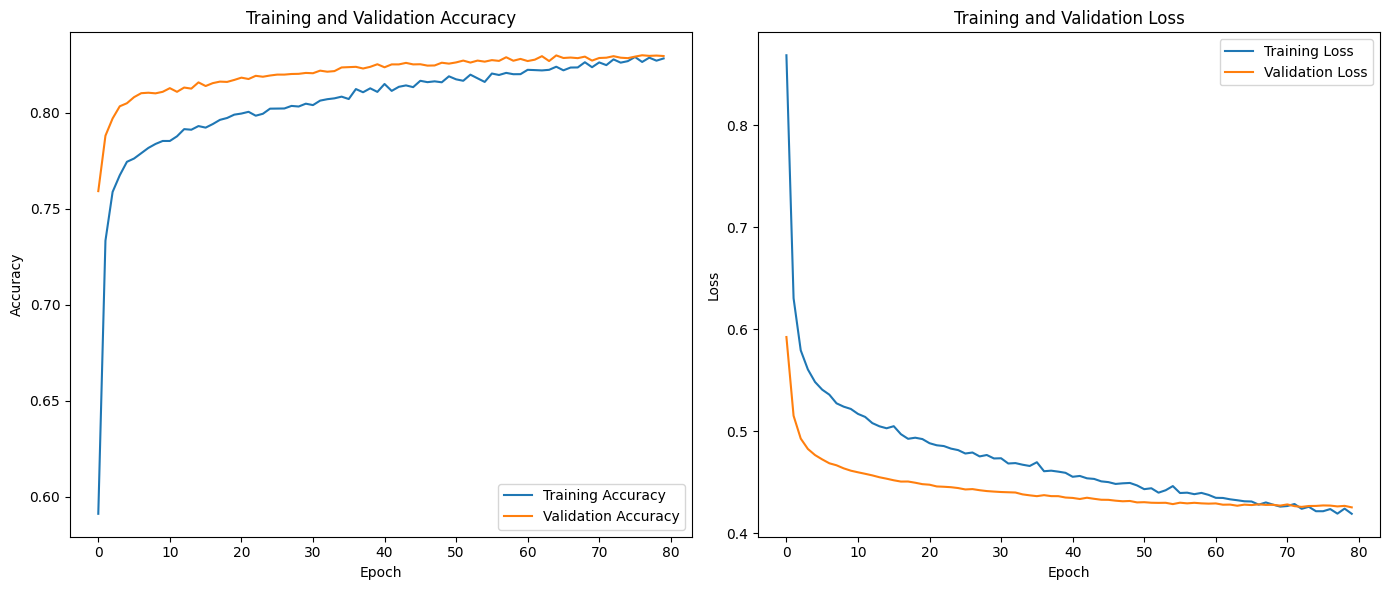

Test Set Accuracy: 0.8361
Test Set Loss: 0.4236


In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt

# Load the dataset
#data = pd.read_csv('base_train.csv')  # Replace with the correct path to your file

# Extract the features (x columns) and the target (y column)
X = df.drop(columns=['Event']).values  # Assuming all columns except 'Event' are features
y = df['Event'].values  # This is the target column

# Encode the target variable (y) to ensure it's numeric
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape X for GRU input: [samples, timesteps, features]
# Assuming each row is a timestep in a sequence
X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Split the dataset into training (70%) and testing (30%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X_reshaped, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)

# Further split the temporary set into validation (50% of the temporary set) and testing (50%)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.3, random_state=42, stratify=y_temp)

# Build the GRU model with Dropout and RMSprop optimizer
model = Sequential()
model.add(Dropout(0.1))
model.add(GRU(135, input_shape=(X_train.shape[1], X_train.shape[2]), activation='tanh', return_sequences=False))
model.add(Dropout(0.3))  # Dropout layer to reduce overfitting
model.add(Dense(70, activation='tanh'))
model.add(Dropout(0.2))  # Additional dropout layer
model.add(Dense(40, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(13, activation='tanh'))
model.add(Dropout(0.1))  # Additional dropout layer
model.add(Dense(len(np.unique(y_encoded)), activation='softmax'))  # Output layer for classification

# Compile the model with RMSprop optimizer
optimizer = RMSprop(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=80, batch_size=100, verbose=1)

# Plotting training & validation accuracy
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plotting training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Set Accuracy: {test_accuracy:.4f}")
print(f"Test Set Loss: {test_loss:.4f}")


In [31]:
# Extract the features (x columns) and the target (y column)
X = df.drop(columns=['Event']).values  # Assuming all columns except 'Event' are features
y = df['Event'].values  # This is the target column
# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [32]:
# 2. Support Vector Machines (SVM)
svm_classifier = SVC(kernel='rbf', random_state=42)  # You can experiment with different kernels
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)

SVM Accuracy: 0.8328333333333333


In [39]:
# 2. Support Vector Machines (SVM)
svm_classifier = SVC(kernel='linear', random_state=42)  # You can experiment with different kernels
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)

SVM Accuracy: 0.8155


In [71]:

# 1. Logistic Regression
logreg_classifier = LogisticRegression(max_iter=100,random_state=42)
logreg_classifier.fit(X_train, y_train)
y_pred_logreg = logreg_classifier.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Accuracy:", accuracy_logreg)


Logistic Regression Accuracy: 0.8116666666666666


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [66]:
from sklearn.linear_model import SGDClassifier

sgd_classifier = SGDClassifier(max_iter=400, tol=1e-4, random_state=42, eta0=1)  # Set learning rate with eta0
sgd_classifier.fit(X_train, y_train)
y_pred_sgd = sgd_classifier.predict(X_test)
accuracy_sgd = accuracy_score(y_test, y_pred_sgd)
print("SGD Classifier Accuracy:", accuracy_sgd)

SGD Classifier Accuracy: 0.8078333333333333


Epoch 1/50


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4823 - loss: 1.0205 - val_accuracy: 0.7570 - val_loss: 0.6641
Epoch 2/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7323 - loss: 0.6775 - val_accuracy: 0.7871 - val_loss: 0.5312
Epoch 3/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7636 - loss: 0.5798 - val_accuracy: 0.7973 - val_loss: 0.4990
Epoch 4/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7757 - loss: 0.5536 - val_accuracy: 0.8006 - val_loss: 0.4854
Epoch 5/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7796 - loss: 0.5419 - val_accuracy: 0.8059 - val_loss: 0.4770
Epoch 6/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7891 - loss: 0.5243 - val_accuracy: 0.8084 - val_loss: 0.4717
Epoch 7/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7902 - loss: 0.5201 - val_accuracy: 0.8097 - val_loss: 0.4673
Epoch 8/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7861 - loss: 0.5204 - val_accuracy: 0.8103 - val_

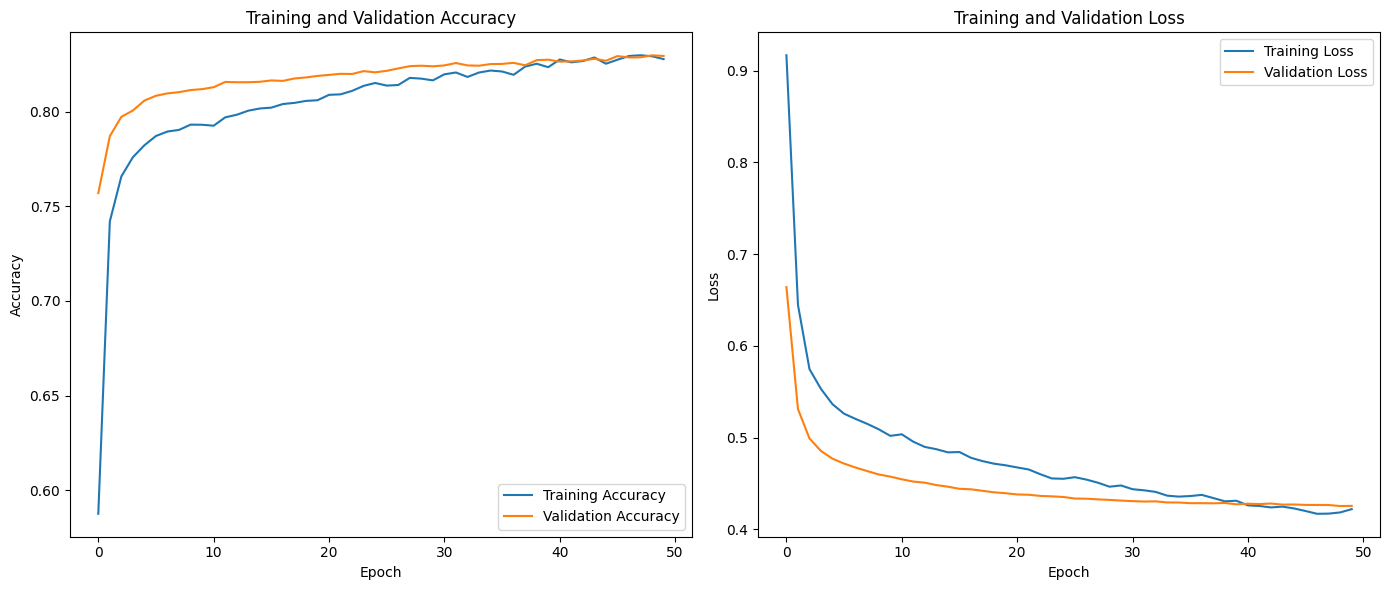

Test Set Accuracy: 0.8324
Test Set Loss: 0.4250


In [74]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt

# Load the dataset
#data = pd.read_csv('base_train.csv')  # Replace with the correct path to your file

# Extract the features (x columns) and the target (y column)
X = df.drop(columns=['Event']).values  # Assuming all columns except 'y' are features
y = df['Event'].values  # This is the target column

# Encode the target variable (y) to ensure it's numeric
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape X for LSTM input: [samples, timesteps, features]
# Assuming each row is a timestep in a sequence
X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X_reshaped, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)

# Further split the temporary set into validation (50% of the temporary set) and testing (50%)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.3, random_state=42, stratify=y_temp)

# Build the LSTM model with Dropout and RMSprop optimizer
model = Sequential()
model.add(Dropout(0.1))
model.add(LSTM(135, input_shape=(X_train.shape[1], X_train.shape[2]), activation='tanh'))
model.add(Dropout(0.3))  # Dropout layer to reduce overfitting
model.add(Dense(70, activation='tanh'))
model.add(Dropout(0.2))  # Additional dropout layer
model.add(Dense(40,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(13, activation='tanh'))
model.add(Dropout(0.1))  # Additional dropout layer
model.add(Dense(len(np.unique(y_encoded)), activation='softmax'))  # Output layer for classification

# Compile the model with RMSprop optimizer
optimizer = RMSprop(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=50, batch_size=100, verbose=1)

# Plotting training & validation accuracy
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plotting training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Set Accuracy: {test_accuracy:.4f}")
print(f"Test Set Loss: {test_loss:.4f}")


In [218]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming your data is in a DataFrame called 'df' and 'Event' is the target variable
y = df['Event']
X = df.drop('Event', axis=1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=145,max_depth=88,min_samples_split=15, random_state=42)  # You can adjust hyperparameters

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("RandomForest Accuracy:", accuracy)

RandomForest Accuracy: 0.8188333333333333


In [232]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier # AdaBoost often uses Decision Trees as base estimators
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming your data is in a DataFrame called 'df' and 'Event' is the target variable
y = df['Event']
X = df.drop('Event', axis=1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a base model (Decision Tree in this case)
base_model = DecisionTreeClassifier(max_depth=100,min_samples_split=80)  # You can adjust the max_depth

# Initialize AdaBoost
adaboost_classifier = AdaBoostClassifier(estimator=base_model, n_estimators=150, random_state=42)  
# You can adjust n_estimators (number of boosting rounds)

# Train the model
adaboost_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = adaboost_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("AdaBoost Accuracy:", accuracy)

AdaBoost Accuracy: 0.7963333333333333


Epoch 1/150


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4904 - loss: 1.0009 - val_accuracy: 0.7317 - val_loss: 0.6517
Epoch 2/150
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6731 - loss: 0.7384 - val_accuracy: 0.7780 - val_loss: 0.5535
Epoch 3/150
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7192 - loss: 0.6536 - val_accuracy: 0.7908 - val_loss: 0.5179
Epoch 4/150
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7347 - loss: 0.6241 - val_accuracy: 0.7949 - val_loss: 0.5028
Epoch 5/150
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7408 - loss: 0.6143 - val_accuracy: 0.8001 - val_loss: 0.4947
Epoch 6/150
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7507 - loss: 0.5995 - val_accuracy: 0.8029 - val_loss: 0.4891
Epoch 7/150
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7486 - loss: 0.5973 - val_accuracy: 0.8029 - val_loss: 0.4859
Epoch 8/150
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7511 - loss: 0.5948 - val_accuracy: 0.8052

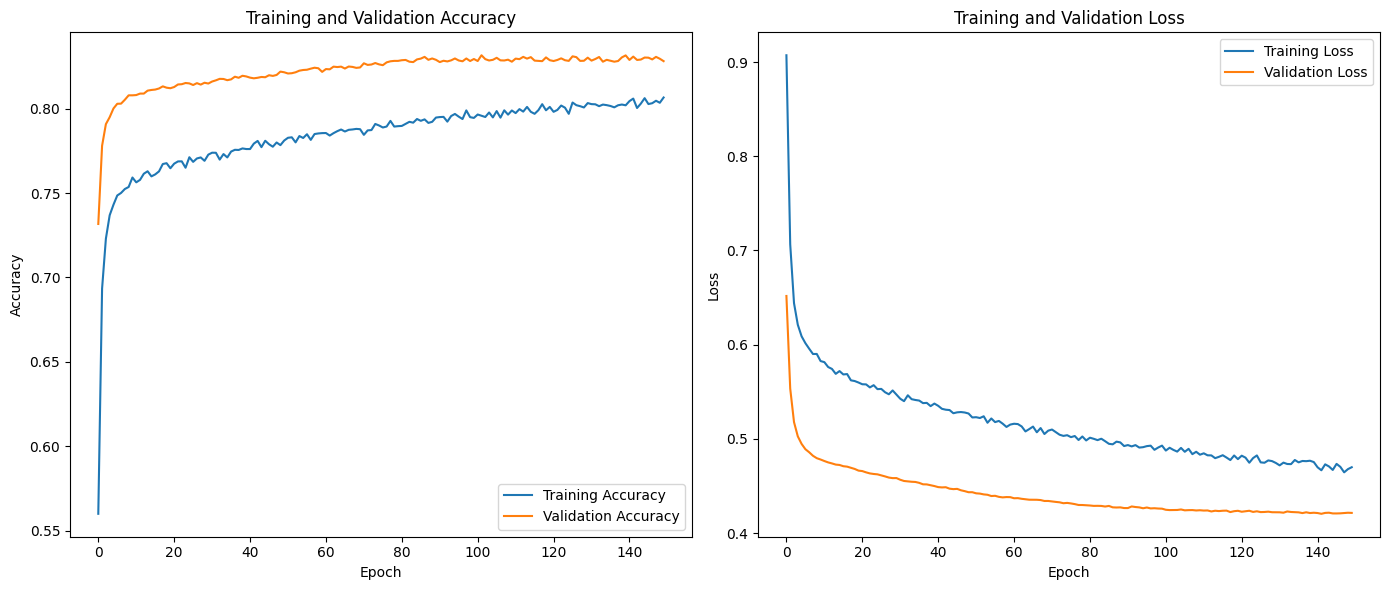

Test Set Accuracy: 0.8317
Test Set Loss: 0.4201


In [253]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt

# Load the dataset
#data = pd.read_csv('base_train.csv')  # Replace with the correct path to your file

# Extract the features (x columns) and the target (y column)
X = df.drop(columns=['Event']).values  # Assuming all columns except 'Event' are features
y = df['Event'].values  # This is the target column

# Encode the target variable (y) to ensure it's numeric
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape X for GRU input: [samples, timesteps, features]
# Assuming each row is a timestep in a sequence
X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Split the dataset into training (70%) and testing (30%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X_reshaped, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)

# Further split the temporary set into validation (50% of the temporary set) and testing (50%)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.3, random_state=42, stratify=y_temp)

# Build the GRU model with Dropout and RMSprop optimizer
model = Sequential()
model.add(Dropout(0.25))
model.add(GRU(135, input_shape=(X_train.shape[1], X_train.shape[2]), activation='tanh'))
model.add(Dropout(0.3))  # Dropout layer to reduce overfitting
model.add(Dense(70, activation='tanh'))
model.add(Dropout(0.2))  # Additional dropout layer
model.add(Dense(40, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(13, activation='tanh'))
model.add(Dropout(0.1))  # Additional dropout layer
model.add(Dense(len(np.unique(y_encoded)), activation='softmax'))  # Output layer for classification

# Compile the model with RMSprop optimizer
optimizer = RMSprop(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=150, batch_size=200, verbose=1)

# Plotting training & validation accuracy
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plotting training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Set Accuracy: {test_accuracy:.4f}")
print(f"Test Set Loss: {test_loss:.4f}")


Epoch 1/75


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5321 - loss: 0.9481 - val_accuracy: 0.7706 - val_loss: 0.5673
Epoch 2/75
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7420 - loss: 0.6195 - val_accuracy: 0.7920 - val_loss: 0.5103
Epoch 3/75
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7636 - loss: 0.5697 - val_accuracy: 0.7988 - val_loss: 0.4930
Epoch 4/75
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7736 - loss: 0.5517 - val_accuracy: 0.8017 - val_loss: 0.4853
Epoch 5/75
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7726 - loss: 0.5472 - val_accuracy: 0.8044 - val_loss: 0.4811
Epoch 6/75
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7805 - loss: 0.5397 - val_accuracy: 0.8061 - val_loss: 0.4778
Epoch 7/75
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7813 - loss: 0.5321 - val_accuracy: 0.8067 - val_loss: 0.4747
Epoch 8/75
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7823 - loss: 0.5290 - val_accuracy: 0.8071 - val_

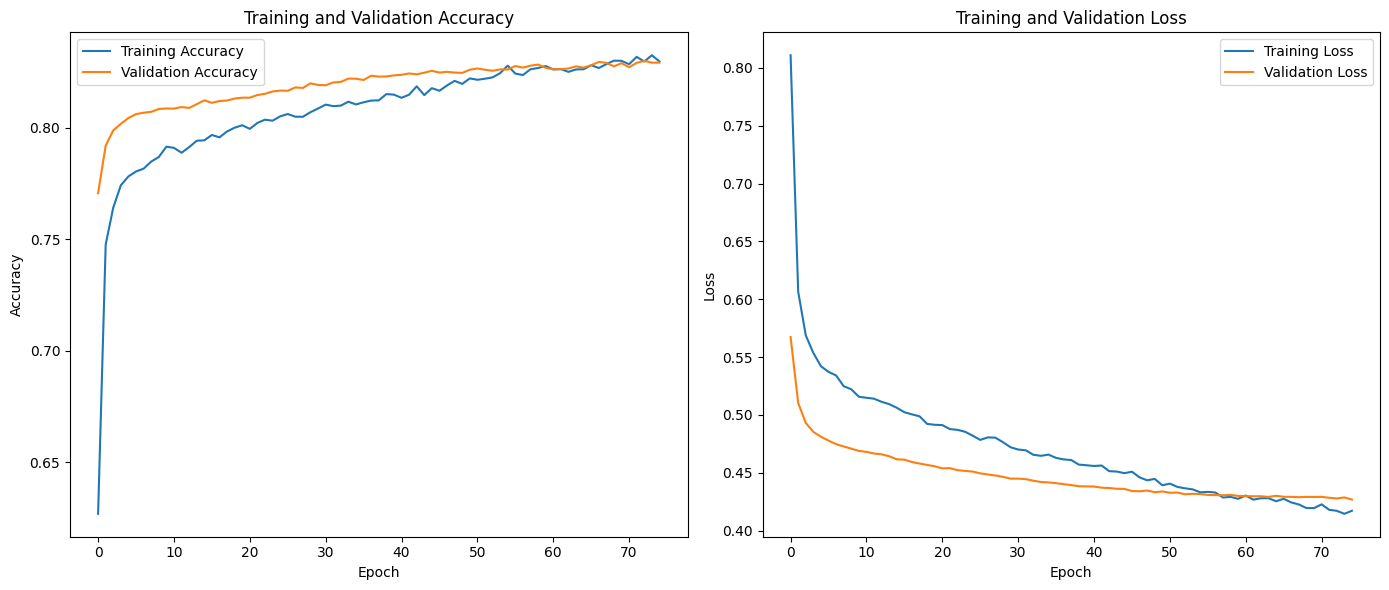

Test Set Accuracy: 0.8370
Test Set Loss: 0.4262


In [239]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt

# Load the dataset
#data = pd.read_csv('base_train.csv')  # Replace with the correct path to your file

# Extract the features (x columns) and the target (y column)
X = df.drop(columns=['Event']).values  # Assuming all columns except 'Event' are features
y = df['Event'].values  # This is the target column

# Encode the target variable (y) to ensure it's numeric
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape X for GRU input: [samples, timesteps, features]
# Assuming each row is a timestep in a sequence
X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Split the dataset into training (70%) and testing (30%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X_reshaped, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)

# Further split the temporary set into validation (50% of the temporary set) and testing (50%)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.3, random_state=42, stratify=y_temp)

# Build the GRU model with Dropout and RMSprop optimizer
model = Sequential()
model.add(Dropout(0.1))
model.add(GRU(135, input_shape=(X_train.shape[1], X_train.shape[2]), activation='tanh', return_sequences=False))
model.add(Dropout(0.3))  # Dropout layer to reduce overfitting
model.add(Dense(70, activation='tanh'))
model.add(Dropout(0.2))  # Additional dropout layer
model.add(Dense(40, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(13, activation='tanh'))
model.add(Dropout(0.1))  # Additional dropout layer
model.add(Dense(len(np.unique(y_encoded)), activation='softmax'))  # Output layer for classification

# Compile the model with RMSprop optimizer
optimizer = RMSprop(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=75, batch_size=100, verbose=1)

# Plotting training & validation accuracy
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plotting training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Set Accuracy: {test_accuracy:.4f}")
print(f"Test Set Loss: {test_loss:.4f}")


Epoch 1/80


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


420/420 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5500 - loss: 0.9434 - val_accuracy: 0.7822 - val_loss: 0.5698
Epoch 2/80
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7552 - loss: 0.5968 - val_accuracy: 0.7983 - val_loss: 0.4990
Epoch 3/80
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7767 - loss: 0.5492 - val_accuracy: 0.8065 - val_loss: 0.4813
Epoch 4/80
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7809 - loss: 0.5334 - val_accuracy: 0.8094 - val_loss: 0.4737
Epoch 5/80
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7887 - loss: 0.5188 - val_accuracy: 0.8109 - val_loss: 0.4675
Epoch 6/80
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7897 - loss: 0.5129 - val_accuracy: 0.8114 - val_loss: 0.4633
Epoch 7/80
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7923 - loss: 0.5003 - val_accuracy: 0.8128 - val_loss: 0.4603
Epoch 8/80
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7958 - loss: 0.5014 - val_accuracy: 0.8148 - val_

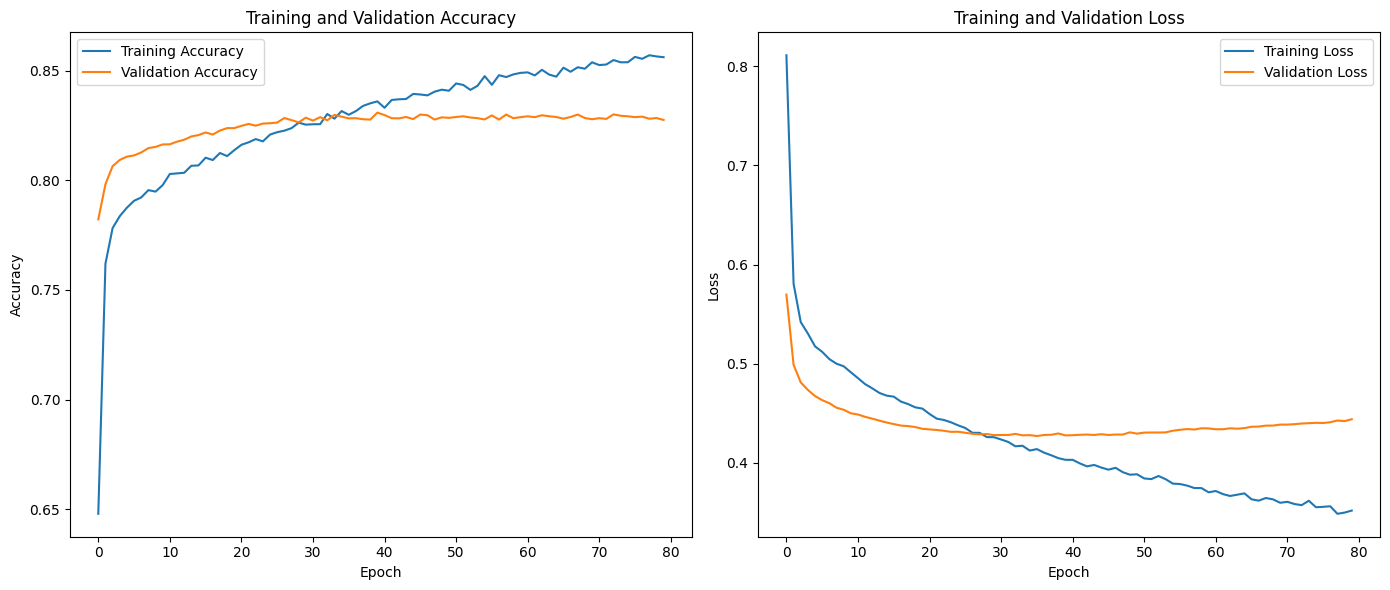

Test Set Accuracy: 0.8326
Test Set Loss: 0.4386


In [7]:
from tensorflow.keras.layers import LSTM, Bidirectional
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt

# Extract the features (x columns) and the target (y column)
X = df.drop(columns=['Event']).values  # Assuming all columns except 'y' are features
y = df['Event'].values  # This is the target column

# Encode the target variable (y) to ensure it's numeric
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape X for LSTM input: [samples, timesteps, features]
# Assuming each row is a timestep in a sequence
X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X_reshaped, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)

# Further split the temporary set into validation (50% of the temporary set) and testing (50%)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.3, random_state=42, stratify=y_temp)

# Build the Bidirectional LSTM model with Dropout and RMSprop optimizer
model = Sequential()
model.add(Dropout(0.1))
model.add(Bidirectional(LSTM(135, activation='tanh', return_sequences=False), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.3))  # Dropout layer to reduce overfitting
model.add(Dense(70, activation='tanh'))
model.add(Dropout(0.2))  # Additional dropout layer
model.add(Dense(40, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(13, activation='tanh'))
model.add(Dropout(0.1))  # Additional dropout layer
model.add(Dense(len(np.unique(y_encoded)), activation='softmax'))  # Output layer for classification

# Compile the model with RMSprop optimizer
optimizer = RMSprop(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=80, batch_size=100, verbose=1)

# Plotting training & validation accuracy
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plotting training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Set Accuracy: {test_accuracy:.4f}")
print(f"Test Set Loss: {test_loss:.4f}")


Epoch 1/40


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


420/420 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5384 - loss: 0.9720 - val_accuracy: 0.7815 - val_loss: 0.5774
Epoch 2/40
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7562 - loss: 0.6048 - val_accuracy: 0.7977 - val_loss: 0.4995
Epoch 3/40
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7768 - loss: 0.5432 - val_accuracy: 0.8034 - val_loss: 0.4815
Epoch 4/40
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7824 - loss: 0.5384 - val_accuracy: 0.8065 - val_loss: 0.4726
Epoch 5/40
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7888 - loss: 0.5175 - val_accuracy: 0.8075 - val_loss: 0.4672
Epoch 6/40
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7888 - loss: 0.5124 - val_accuracy: 0.8103 - val_loss: 0.4622
Epoch 7/40
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7951 - loss: 0.5007 - val_accuracy: 0.8127 - val_loss: 0.4585
Epoch 8/40
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7954 - loss: 0.4965 - val_accuracy: 0.8127 - val_

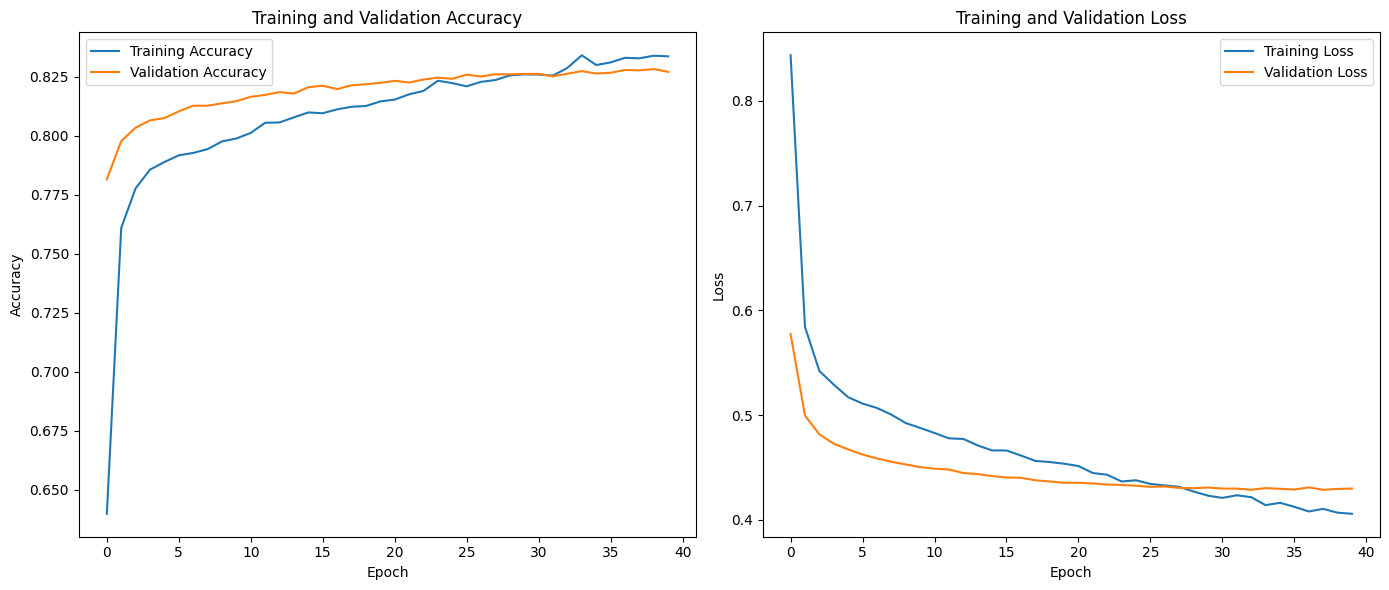

Test Set Accuracy: 0.8361
Test Set Loss: 0.4264


In [8]:
from tensorflow.keras.layers import LSTM, Bidirectional
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt

# Extract the features (x columns) and the target (y column)
X = df.drop(columns=['Event']).values  # Assuming all columns except 'y' are features
y = df['Event'].values  # This is the target column

# Encode the target variable (y) to ensure it's numeric
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape X for LSTM input: [samples, timesteps, features]
# Assuming each row is a timestep in a sequence
X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X_reshaped, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)

# Further split the temporary set into validation (50% of the temporary set) and testing (50%)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.3, random_state=42, stratify=y_temp)

# Build the Bidirectional LSTM model with Dropout and RMSprop optimizer
model = Sequential()
model.add(Dropout(0.1))
model.add(Bidirectional(LSTM(135, activation='tanh', return_sequences=False), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.3))  # Dropout layer to reduce overfitting
model.add(Dense(70, activation='tanh'))
model.add(Dropout(0.2))  # Additional dropout layer
model.add(Dense(40, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(13, activation='tanh'))
model.add(Dropout(0.1))  # Additional dropout layer
model.add(Dense(len(np.unique(y_encoded)), activation='softmax'))  # Output layer for classification

# Compile the model with RMSprop optimizer
optimizer = RMSprop(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=40, batch_size=100, verbose=1)

# Plotting training & validation accuracy
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plotting training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Set Accuracy: {test_accuracy:.4f}")
print(f"Test Set Loss: {test_loss:.4f}")


Epoch 1/38


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


840/840 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5830 - loss: 0.8915 - val_accuracy: 0.7937 - val_loss: 0.5063
Epoch 2/38
840/840 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7742 - loss: 0.5530 - val_accuracy: 0.8025 - val_loss: 0.4785
Epoch 3/38
840/840 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7849 - loss: 0.5311 - val_accuracy: 0.8108 - val_loss: 0.4673
Epoch 4/38
840/840 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7910 - loss: 0.5161 - val_accuracy: 0.8124 - val_loss: 0.4614
Epoch 5/38
840/840 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7910 - loss: 0.5050 - val_accuracy: 0.8122 - val_loss: 0.4577
Epoch 6/38
840/840 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7979 - loss: 0.4943 - val_accuracy: 0.8159 - val_loss: 0.4530
Epoch 7/38
840/840 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7976 - loss: 0.4910 - val_accuracy: 0.8149 - val_loss: 0.4500
Epoch 8/38
840/840 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8005 - loss: 0.4839 - val_accuracy: 0.8175 - val_

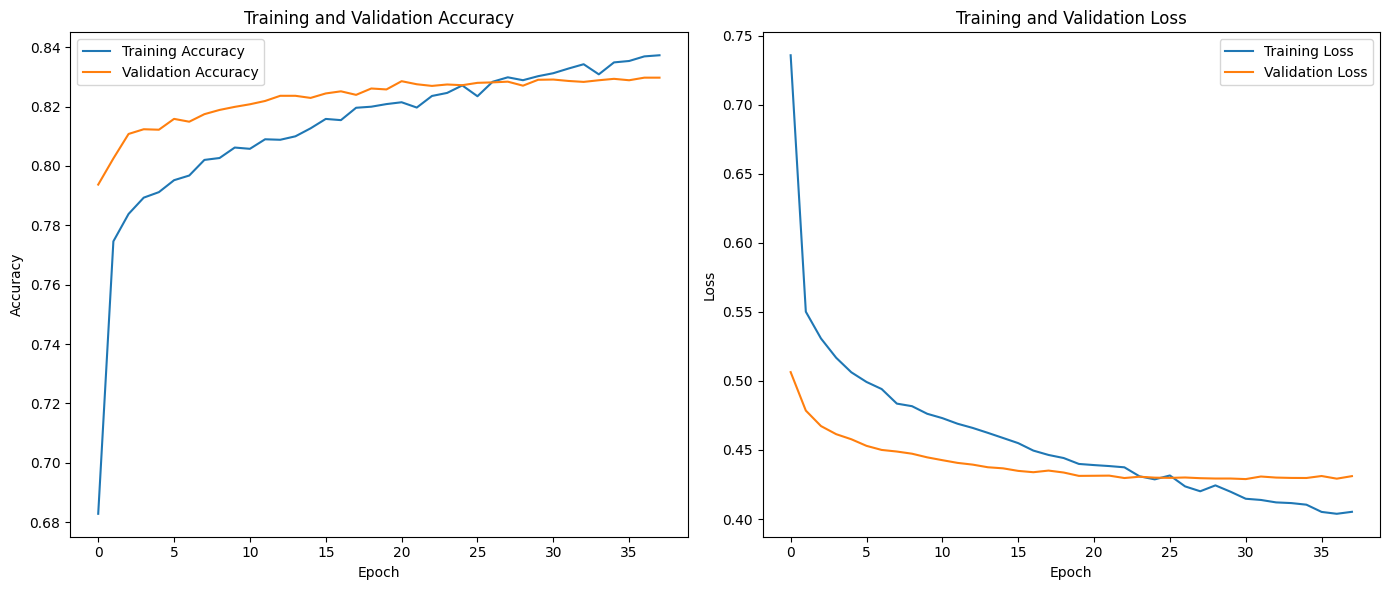

Test Set Accuracy: 0.8383
Test Set Loss: 0.4256


In [10]:
from tensorflow.keras.layers import LSTM, Bidirectional
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt

# Extract the features (x columns) and the target (y column)
X = df.drop(columns=['Event']).values  # Assuming all columns except 'y' are features
y = df['Event'].values  # This is the target column

# Encode the target variable (y) to ensure it's numeric
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape X for LSTM input: [samples, timesteps, features]
# Assuming each row is a timestep in a sequence
X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X_reshaped, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)

# Further split the temporary set into validation (50% of the temporary set) and testing (50%)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.3, random_state=42, stratify=y_temp)

# Build the Bidirectional LSTM model with Dropout and RMSprop optimizer
model = Sequential()
model.add(Dropout(0.1))
model.add(Bidirectional(LSTM(135, activation='tanh', return_sequences=False), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.3))  # Dropout layer to reduce overfitting
model.add(Dense(70, activation='tanh'))
model.add(Dropout(0.2))  # Additional dropout layer
model.add(Dense(40, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(13, activation='tanh'))
model.add(Dropout(0.1))  # Additional dropout layer
model.add(Dense(len(np.unique(y_encoded)), activation='softmax'))  # Output layer for classification

# Compile the model with RMSprop optimizer
optimizer = RMSprop(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=38, batch_size=50, verbose=1)

# Plotting training & validation accuracy
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plotting training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Set Accuracy: {test_accuracy:.4f}")
print(f"Test Set Loss: {test_loss:.4f}")


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.layers import LSTM, Bidirectional
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt


/var/folders/9q/ftjfwhn958sgctkd6pctp58h0000gn/T/ipykernel_1603/1966765833.py:1: DtypeWarning: Columns (3,15,24,47,49,50) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('lstm.csv')


Epoch 1/50


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


560/560 ━━━━━━━━━━━━━━━━━━━━ 73s 128ms/step - accuracy: 0.4064 - loss: 1.2154 - val_accuracy: 0.5027 - val_loss: 1.0238
Epoch 2/50
560/560 ━━━━━━━━━━━━━━━━━━━━ 76s 136ms/step - accuracy: 0.4921 - loss: 1.0262 - val_accuracy: 0.5496 - val_loss: 0.9296
Epoch 3/50
560/560 ━━━━━━━━━━━━━━━━━━━━ 76s 136ms/step - accuracy: 0.5727 - loss: 0.9158 - val_accuracy: 0.6921 - val_loss: 0.7702
Epoch 4/50
560/560 ━━━━━━━━━━━━━━━━━━━━ 79s 141ms/step - accuracy: 0.6949 - loss: 0.7583 - val_accuracy: 0.7543 - val_loss: 0.6522
Epoch 5/50
560/560 ━━━━━━━━━━━━━━━━━━━━ 86s 153ms/step - accuracy: 0.7575 - loss: 0.6468 - val_accuracy: 0.7746 - val_loss: 0.6015
Epoch 6/50
560/560 ━━━━━━━━━━━━━━━━━━━━ 88s 157ms/step - accuracy: 0.7831 - loss: 0.5925 - val_accuracy: 0.7953 - val_loss: 0.5532
Epoch 7/50
560/560 ━━━━━━━━━━━━━━━━━━━━ 89s 158ms/step - accuracy: 0.8031 - loss: 0.5474 - val_accuracy: 0.8073 - val_loss: 0.5261
Epoch 8/50
560/560 ━━━━━━━━━━━━━━━━━━━━ 88s 158ms/step - accuracy: 0.8130 - loss: 0.5203 - val

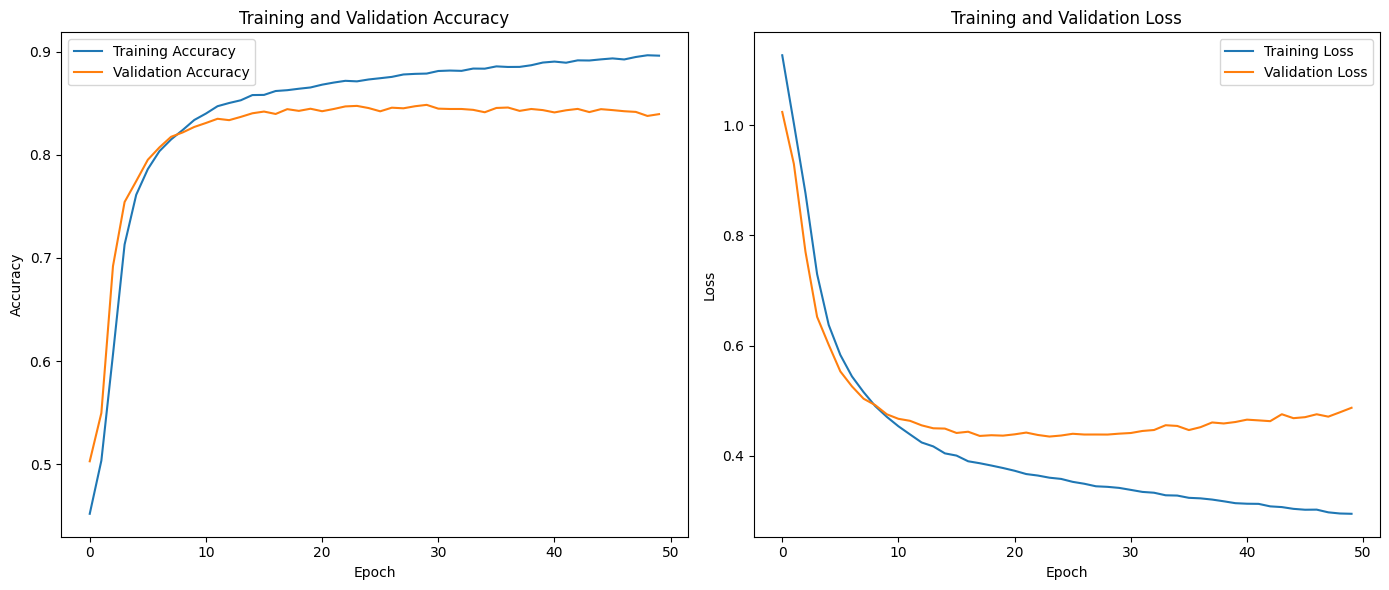

Test Set Accuracy: 0.8352
Test Set Loss: 0.4911


In [9]:
df=pd.read_csv('lstm.csv')

# 1. Prepare the data
X = df['Commentary'].astype(str).tolist()
y = df['PlayType_description'].values

# 2. Encode the target variable (y)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 3. Tokenize the text data
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(X)
X_sequences = tokenizer.texts_to_sequences(X)

# 4. Pad sequences for consistent length
max_length = 100  # Adjust as needed
X_padded = pad_sequences(X_sequences, maxlen=max_length, padding='post', truncating='post')

# 5. Split the dataset
X_train, X_temp, y_train, y_temp = train_test_split(X_padded, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# ... (rest of your model building and training code)
# Build the Bidirectional LSTM model with Dropout and RMSprop optimizer
model = Sequential()
model.add(Embedding(5000, 128, input_length=max_length)) # Add Embedding layer
model.add(Dropout(0.1))
model.add(Bidirectional(LSTM(135, activation='tanh', return_sequences=False))) # Input shape is automatically inferred
model.add(Dropout(0.3))  # Dropout layer to reduce overfitting
model.add(Dense(70, activation='tanh'))
model.add(Dropout(0.2))  # Additional dropout layer
model.add(Dense(40, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(13, activation='tanh'))
model.add(Dropout(0.1))  # Additional dropout layer
model.add(Dense(len(np.unique(y_encoded)), activation='softmax'))  # Output layer for classification
# 6. Compile the model
optimizer = RMSprop(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=100, verbose=1)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plotting training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Set Accuracy: {test_accuracy:.4f}")
print(f"Test Set Loss: {test_loss:.4f}")

/var/folders/9q/ftjfwhn958sgctkd6pctp58h0000gn/T/ipykernel_1603/2039167154.py:1: DtypeWarning: Columns (3,15,24,47,49,50) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('lstm.csv')


Epoch 1/30


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


560/560 ━━━━━━━━━━━━━━━━━━━━ 106s 188ms/step - accuracy: 0.3944 - loss: 1.2206 - val_accuracy: 0.5056 - val_loss: 1.0088
Epoch 2/30
560/560 ━━━━━━━━━━━━━━━━━━━━ 120s 214ms/step - accuracy: 0.5166 - loss: 0.9946 - val_accuracy: 0.6970 - val_loss: 0.7887
Epoch 3/30
560/560 ━━━━━━━━━━━━━━━━━━━━ 117s 210ms/step - accuracy: 0.6841 - loss: 0.7762 - val_accuracy: 0.7502 - val_loss: 0.6574
Epoch 4/30
560/560 ━━━━━━━━━━━━━━━━━━━━ 117s 209ms/step - accuracy: 0.7437 - loss: 0.6631 - val_accuracy: 0.7790 - val_loss: 0.5912
Epoch 5/30
560/560 ━━━━━━━━━━━━━━━━━━━━ 110s 197ms/step - accuracy: 0.7803 - loss: 0.5980 - val_accuracy: 0.7961 - val_loss: 0.5462
Epoch 6/30
560/560 ━━━━━━━━━━━━━━━━━━━━ 1027s 2s/step - accuracy: 0.8000 - loss: 0.5474 - val_accuracy: 0.8138 - val_loss: 0.5102
Epoch 7/30
560/560 ━━━━━━━━━━━━━━━━━━━━ 523s 936ms/step - accuracy: 0.8185 - loss: 0.5055 - val_accuracy: 0.8214 - val_loss: 0.4948
Epoch 8/30
560/560 ━━━━━━━━━━━━━━━━━━━━ 82s 146ms/step - accuracy: 0.8271 - loss: 0.4863 

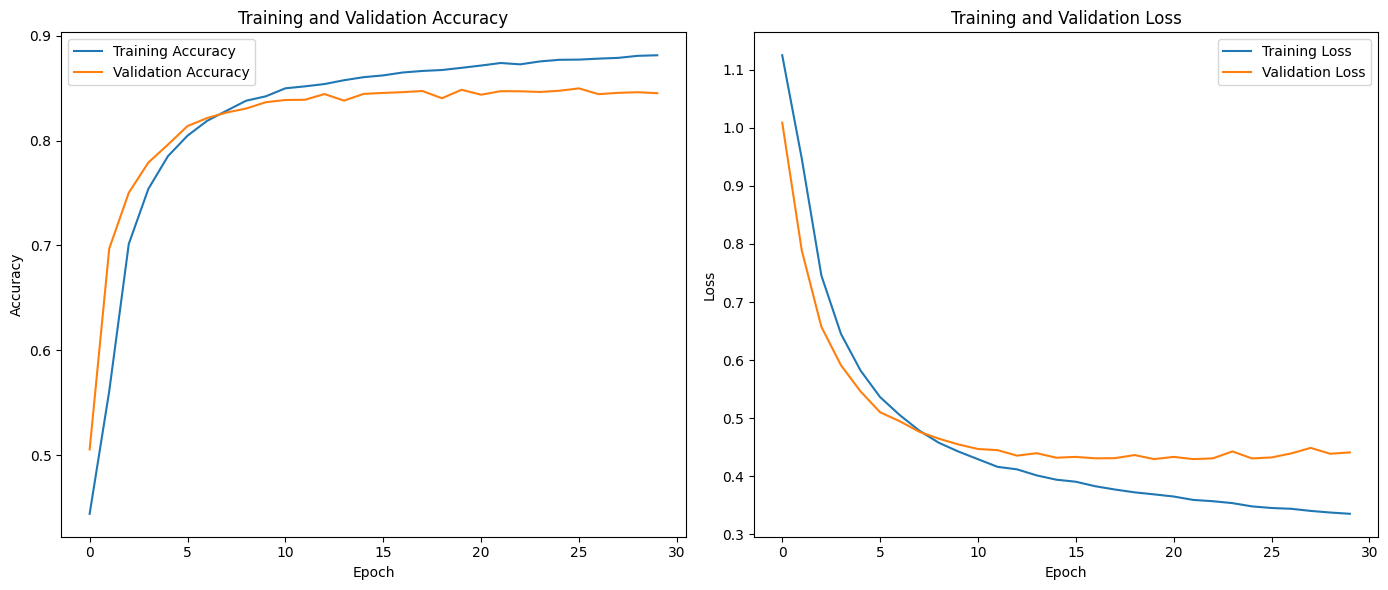

Test Set Accuracy: 0.8395
Test Set Loss: 0.4548


In [13]:
df=pd.read_csv('lstm.csv')

# 1. Prepare the data
X = df['Commentary'].astype(str).tolist()
y = df['PlayType_description'].values

# 2. Encode the target variable (y)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 3. Tokenize the text data
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(X)
X_sequences = tokenizer.texts_to_sequences(X)

# 4. Pad sequences for consistent length
max_length = 100  # Adjust as needed
X_padded = pad_sequences(X_sequences, maxlen=max_length, padding='post', truncating='post')

# 5. Split the dataset
X_train, X_temp, y_train, y_temp = train_test_split(X_padded, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# ... (rest of your model building and training code)
# Build the Bidirectional LSTM model with Dropout and RMSprop optimizer
model = Sequential()
model.add(Embedding(5000, 128, input_length=max_length)) # Add Embedding layer
model.add(Dropout(0.1))
model.add(Bidirectional(LSTM(135, activation='tanh', return_sequences=False))) # Input shape is automatically inferred
model.add(Dropout(0.3))  # Dropout layer to reduce overfitting
model.add(Dense(70, activation='tanh'))
model.add(Dropout(0.2))  # Additional dropout layer
model.add(Dense(40, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(13, activation='tanh'))
model.add(Dropout(0.1))  # Additional dropout layer
model.add(Dense(len(np.unique(y_encoded)), activation='softmax'))  # Output layer for classification
# 6. Compile the model
optimizer = RMSprop(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=100, verbose=1)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plotting training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Set Accuracy: {test_accuracy:.4f}")
print(f"Test Set Loss: {test_loss:.4f}")

/var/folders/9q/ftjfwhn958sgctkd6pctp58h0000gn/T/ipykernel_1603/493139321.py:1: DtypeWarning: Columns (3,15,24,47,49,50) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('lstm.csv')


Epoch 1/8


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


560/560 ━━━━━━━━━━━━━━━━━━━━ 95s 167ms/step - accuracy: 0.5693 - loss: 0.9447 - val_accuracy: 0.8196 - val_loss: 0.4929
Epoch 2/8
560/560 ━━━━━━━━━━━━━━━━━━━━ 174s 310ms/step - accuracy: 0.8272 - loss: 0.4804 - val_accuracy: 0.8351 - val_loss: 0.4502
Epoch 3/8
560/560 ━━━━━━━━━━━━━━━━━━━━ 167s 299ms/step - accuracy: 0.8461 - loss: 0.4304 - val_accuracy: 0.8397 - val_loss: 0.4298
Epoch 4/8
560/560 ━━━━━━━━━━━━━━━━━━━━ 173s 309ms/step - accuracy: 0.8575 - loss: 0.3971 - val_accuracy: 0.8508 - val_loss: 0.4166
Epoch 5/8
560/560 ━━━━━━━━━━━━━━━━━━━━ 167s 298ms/step - accuracy: 0.8654 - loss: 0.3773 - val_accuracy: 0.8522 - val_loss: 0.4144
Epoch 6/8
560/560 ━━━━━━━━━━━━━━━━━━━━ 167s 299ms/step - accuracy: 0.8734 - loss: 0.3521 - val_accuracy: 0.8432 - val_loss: 0.4314
Epoch 7/8
560/560 ━━━━━━━━━━━━━━━━━━━━ 160s 286ms/step - accuracy: 0.8808 - loss: 0.3356 - val_accuracy: 0.8493 - val_loss: 0.4253
Epoch 8/8
560/560 ━━━━━━━━━━━━━━━━━━━━ 160s 286ms/step - accuracy: 0.8834 - loss: 0.3278 - val

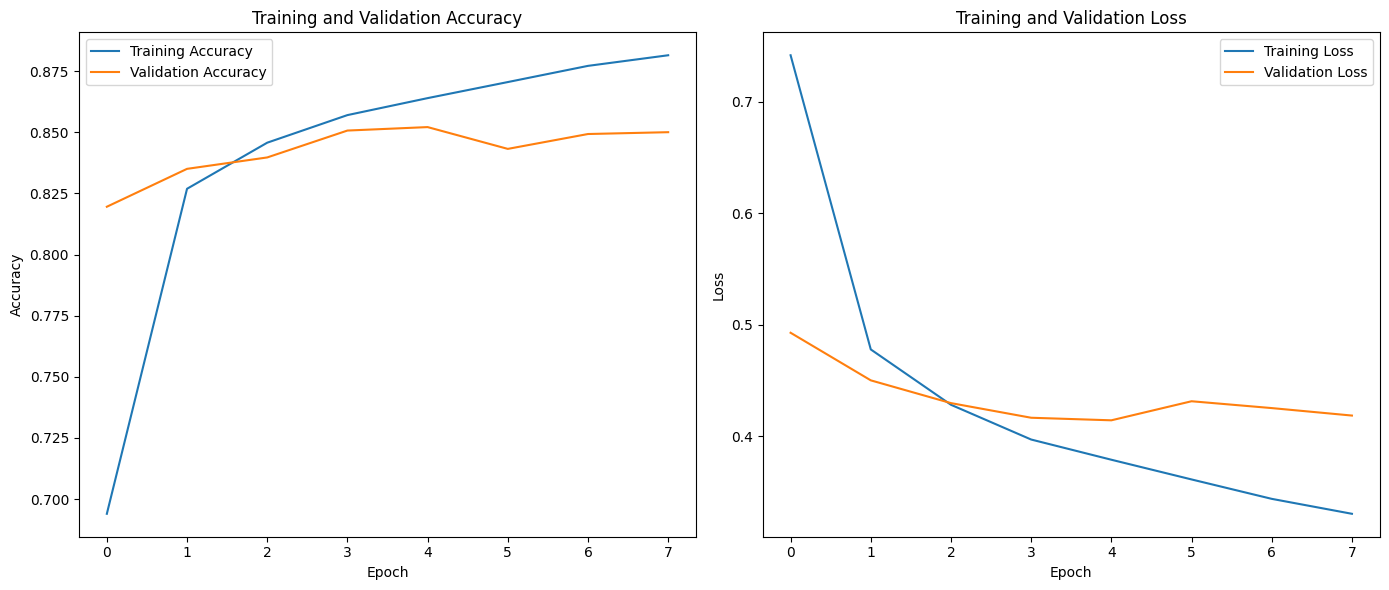

Test Set Accuracy: 0.8428
Test Set Loss: 0.4370


In [16]:
df=pd.read_csv('lstm.csv')

# 1. Prepare the data
X = df['Commentary'].astype(str).tolist()
y = df['PlayType_description'].values

# 2. Encode the target variable (y)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 3. Tokenize the text data
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(X)
X_sequences = tokenizer.texts_to_sequences(X)

# 4. Pad sequences for consistent length
max_length = 100  # Adjust as needed
X_padded = pad_sequences(X_sequences, maxlen=max_length, padding='post', truncating='post')

# 5. Split the dataset
X_train, X_temp, y_train, y_temp = train_test_split(X_padded, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# ... (rest of your model building and training code)
# Build the Bidirectional LSTM model with Dropout and RMSprop optimizer
model = Sequential()
model.add(Embedding(5000, 128, input_length=max_length)) # Add Embedding layer
model.add(Dropout(0.1))
model.add(Bidirectional(LSTM(135, activation='tanh', return_sequences=False))) # Input shape is automatically inferred
model.add(Dropout(0.3))  # Dropout layer to reduce overfitting
model.add(Dense(70, activation='tanh'))
model.add(Dropout(0.2))  # Additional dropout layer
model.add(Dense(40, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(13, activation='tanh'))
model.add(Dropout(0.1))  # Additional dropout layer
model.add(Dense(len(np.unique(y_encoded)), activation='softmax'))  # Output layer for classification
# 6. Compile the model
optimizer = RMSprop(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=8, batch_size=100, verbose=1)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plotting training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Set Accuracy: {test_accuracy:.4f}")
print(f"Test Set Loss: {test_loss:.4f}")

/var/folders/9q/ftjfwhn958sgctkd6pctp58h0000gn/T/ipykernel_1603/493139321.py:1: DtypeWarning: Columns (3,15,24,47,49,50) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('lstm.csv')


Epoch 1/8


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


560/560 ━━━━━━━━━━━━━━━━━━━━ 147s 261ms/step - accuracy: 0.5897 - loss: 0.9222 - val_accuracy: 0.8185 - val_loss: 0.4891
Epoch 2/8
560/560 ━━━━━━━━━━━━━━━━━━━━ 152s 272ms/step - accuracy: 0.8231 - loss: 0.4876 - val_accuracy: 0.8378 - val_loss: 0.4385
Epoch 3/8
560/560 ━━━━━━━━━━━━━━━━━━━━ 155s 277ms/step - accuracy: 0.8431 - loss: 0.4310 - val_accuracy: 0.8426 - val_loss: 0.4297
Epoch 4/8
560/560 ━━━━━━━━━━━━━━━━━━━━ 111s 198ms/step - accuracy: 0.8571 - loss: 0.3913 - val_accuracy: 0.8424 - val_loss: 0.4200
Epoch 5/8
560/560 ━━━━━━━━━━━━━━━━━━━━ 90s 160ms/step - accuracy: 0.8679 - loss: 0.3683 - val_accuracy: 0.8457 - val_loss: 0.4120
Epoch 6/8
560/560 ━━━━━━━━━━━━━━━━━━━━ 92s 164ms/step - accuracy: 0.8735 - loss: 0.3535 - val_accuracy: 0.8470 - val_loss: 0.4240
Epoch 7/8
560/560 ━━━━━━━━━━━━━━━━━━━━ 89s 159ms/step - accuracy: 0.8750 - loss: 0.3453 - val_accuracy: 0.8486 - val_loss: 0.4233
Epoch 8/8
560/560 ━━━━━━━━━━━━━━━━━━━━ 89s 160ms/step - accuracy: 0.8823 - loss: 0.3272 - val_ac

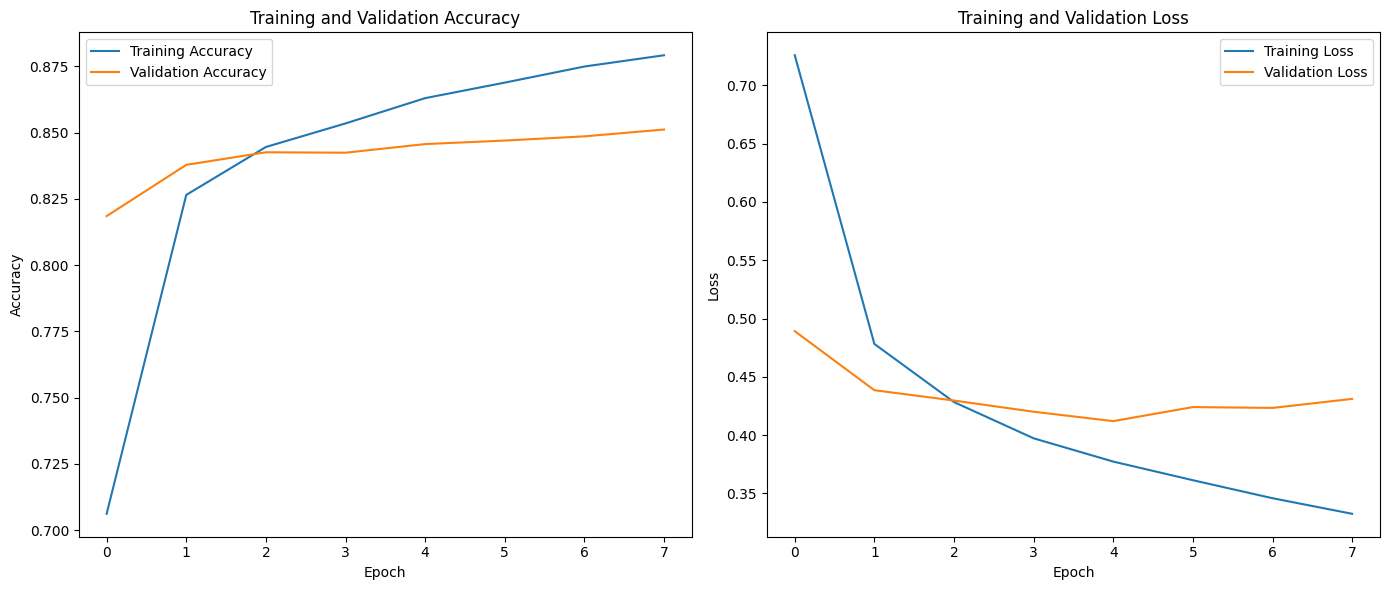

Test Set Accuracy: 0.8438
Test Set Loss: 0.4473


In [18]:
df=pd.read_csv('lstm.csv')

# 1. Prepare the data
X = df['Commentary'].astype(str).tolist()
y = df['PlayType_description'].values

# 2. Encode the target variable (y)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 3. Tokenize the text data
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(X)
X_sequences = tokenizer.texts_to_sequences(X)

# 4. Pad sequences for consistent length
max_length = 100  # Adjust as needed
X_padded = pad_sequences(X_sequences, maxlen=max_length, padding='post', truncating='post')

# 5. Split the dataset
X_train, X_temp, y_train, y_temp = train_test_split(X_padded, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# ... (rest of your model building and training code)
# Build the Bidirectional LSTM model with Dropout and RMSprop optimizer
model = Sequential()
model.add(Embedding(5000, 128, input_length=max_length)) # Add Embedding layer
model.add(Dropout(0.1))
model.add(Bidirectional(LSTM(135, activation='tanh', return_sequences=False))) # Input shape is automatically inferred
model.add(Dropout(0.3))  # Dropout layer to reduce overfitting
model.add(Dense(70, activation='tanh'))
model.add(Dropout(0.2))  # Additional dropout layer
model.add(Dense(40, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(13, activation='tanh'))
model.add(Dropout(0.1))  # Additional dropout layer
model.add(Dense(len(np.unique(y_encoded)), activation='softmax'))  # Output layer for classification
# 6. Compile the model
optimizer = RMSprop(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=8, batch_size=100, verbose=1)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plotting training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Set Accuracy: {test_accuracy:.4f}")
print(f"Test Set Loss: {test_loss:.4f}")

/var/folders/9q/ftjfwhn958sgctkd6pctp58h0000gn/T/ipykernel_6300/733964033.py:1: DtypeWarning: Columns (3,15,24,47,49,50) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('lstm.csv')


Epoch 1/8


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


560/560 ━━━━━━━━━━━━━━━━━━━━ 71s 125ms/step - accuracy: 0.5748 - loss: 0.9559 - val_accuracy: 0.8035 - val_loss: 0.5259
Epoch 2/8
560/560 ━━━━━━━━━━━━━━━━━━━━ 81s 144ms/step - accuracy: 0.8216 - loss: 0.4970 - val_accuracy: 0.8317 - val_loss: 0.4512
Epoch 3/8
560/560 ━━━━━━━━━━━━━━━━━━━━ 81s 145ms/step - accuracy: 0.8432 - loss: 0.4333 - val_accuracy: 0.8445 - val_loss: 0.4175
Epoch 4/8
560/560 ━━━━━━━━━━━━━━━━━━━━ 80s 142ms/step - accuracy: 0.8551 - loss: 0.3996 - val_accuracy: 0.8391 - val_loss: 0.4201
Epoch 5/8
560/560 ━━━━━━━━━━━━━━━━━━━━ 83s 149ms/step - accuracy: 0.8600 - loss: 0.3852 - val_accuracy: 0.8369 - val_loss: 0.4413
Epoch 6/8
560/560 ━━━━━━━━━━━━━━━━━━━━ 86s 154ms/step - accuracy: 0.8629 - loss: 0.3707 - val_accuracy: 0.8487 - val_loss: 0.4113
Epoch 7/8
560/560 ━━━━━━━━━━━━━━━━━━━━ 85s 152ms/step - accuracy: 0.8694 - loss: 0.3570 - val_accuracy: 0.8422 - val_loss: 0.4398
Epoch 8/8
560/560 ━━━━━━━━━━━━━━━━━━━━ 89s 160ms/step - accuracy: 0.8753 - loss: 0.3430 - val_accura

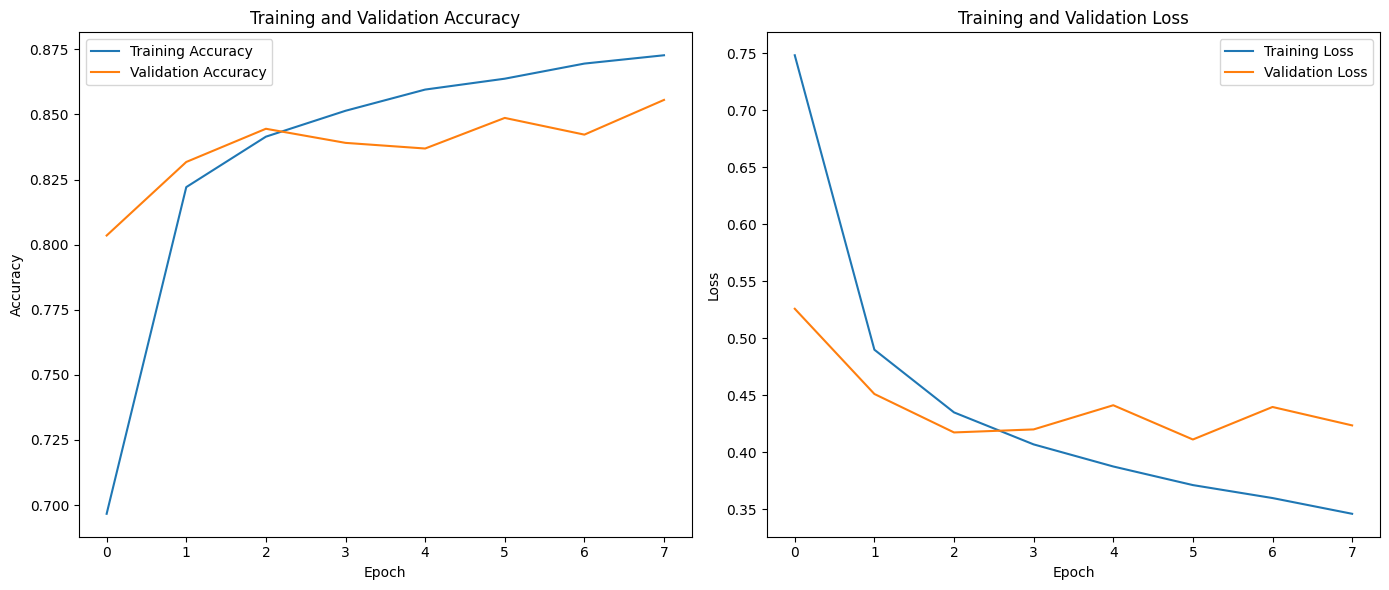

Test Set Accuracy: 0.8451
Test Set Loss: 0.4439


In [2]:
df=pd.read_csv('lstm.csv')

# 1. Prepare the data
X = df['Commentary'].astype(str).tolist()
y = df['PlayType_description'].values

# 2. Encode the target variable (y)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 3. Tokenize the text data
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(X)
X_sequences = tokenizer.texts_to_sequences(X)

# 4. Pad sequences for consistent length
max_length = 100  # Adjust as needed
X_padded = pad_sequences(X_sequences, maxlen=max_length, padding='post', truncating='post')

# 5. Split the dataset
X_train, X_temp, y_train, y_temp = train_test_split(X_padded, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# ... (rest of your model building and training code)
# Build the Bidirectional LSTM model with Dropout and RMSprop optimizer
model = Sequential()
model.add(Embedding(5000, 128, input_length=max_length)) # Add Embedding layer
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(135, activation='tanh', return_sequences=False))) # Input shape is automatically inferred
model.add(Dropout(0.3))  # Dropout layer to reduce overfitting
model.add(Dense(70, activation='tanh'))
model.add(Dropout(0.2))  # Additional dropout layer
model.add(Dense(40, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(13, activation='tanh'))
model.add(Dropout(0.1))  # Additional dropout layer
model.add(Dense(len(np.unique(y_encoded)), activation='softmax'))  # Output layer for classification
# 6. Compile the model
optimizer = RMSprop(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=8, batch_size=100, verbose=1)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plotting training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Set Accuracy: {test_accuracy:.4f}")
print(f"Test Set Loss: {test_loss:.4f}")

/var/folders/9q/ftjfwhn958sgctkd6pctp58h0000gn/T/ipykernel_2291/308475720.py:13: DtypeWarning: Columns (3,15,24,47,49,50) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('lstm.csv')


Epoch 1/8


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


560/560 ━━━━━━━━━━━━━━━━━━━━ 83s 147ms/step - accuracy: 0.5875 - loss: 0.9252 - val_accuracy: 0.7881 - val_loss: 0.5553
Epoch 2/8
560/560 ━━━━━━━━━━━━━━━━━━━━ 100s 178ms/step - accuracy: 0.7926 - loss: 0.5595 - val_accuracy: 0.8168 - val_loss: 0.4782
Epoch 3/8
560/560 ━━━━━━━━━━━━━━━━━━━━ 86s 154ms/step - accuracy: 0.8339 - loss: 0.4580 - val_accuracy: 0.8454 - val_loss: 0.4272
Epoch 4/8
560/560 ━━━━━━━━━━━━━━━━━━━━ 85s 151ms/step - accuracy: 0.8494 - loss: 0.4146 - val_accuracy: 0.8442 - val_loss: 0.4166
Epoch 5/8
560/560 ━━━━━━━━━━━━━━━━━━━━ 86s 154ms/step - accuracy: 0.8605 - loss: 0.3873 - val_accuracy: 0.8497 - val_loss: 0.4106
Epoch 6/8
560/560 ━━━━━━━━━━━━━━━━━━━━ 107s 191ms/step - accuracy: 0.8631 - loss: 0.3755 - val_accuracy: 0.8467 - val_loss: 0.4189
Epoch 7/8
560/560 ━━━━━━━━━━━━━━━━━━━━ 138s 247ms/step - accuracy: 0.8679 - loss: 0.3655 - val_accuracy: 0.8505 - val_loss: 0.4153
Epoch 8/8
560/560 ━━━━━━━━━━━━━━━━━━━━ 139s 247ms/step - accuracy: 0.8760 - loss: 0.3409 - val_ac

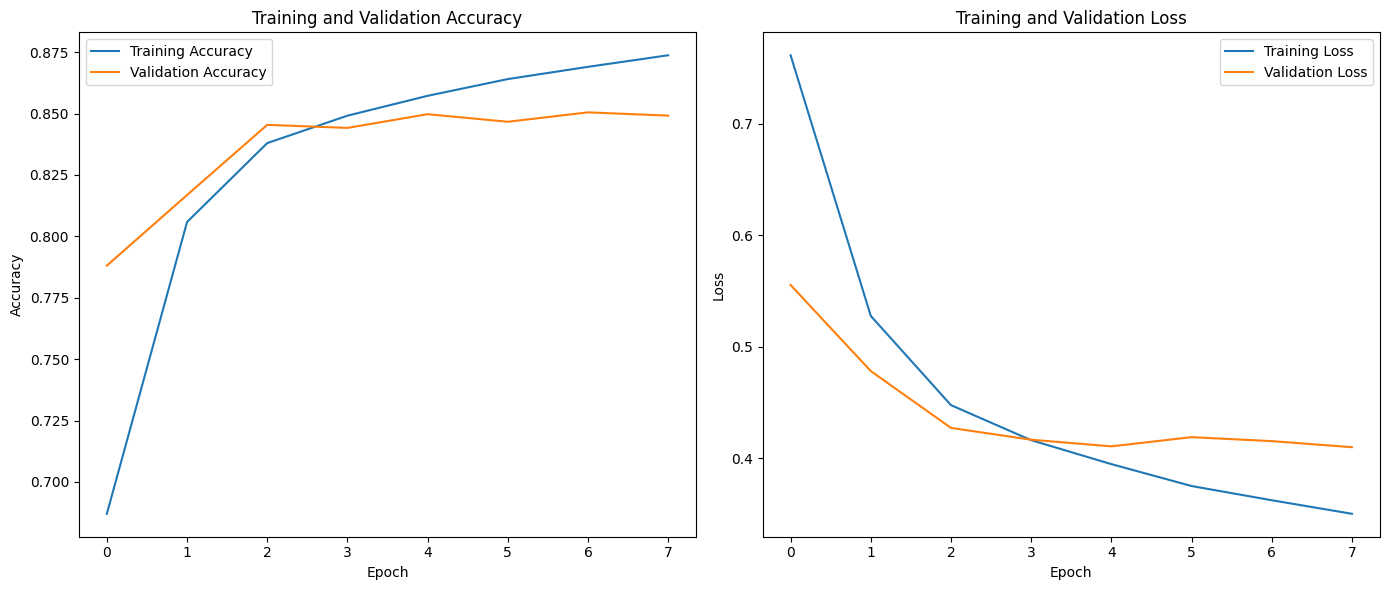

Test Set Accuracy: 0.8426
Test Set Loss: 0.4312


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, GRU, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('lstm.csv')

# 1. Prepare the data
X = df['Commentary'].astype(str).tolist()
y = df['PlayType_description'].values

# 2. Encode the target variable (y)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 3. Tokenize the text data
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(X)
X_sequences = tokenizer.texts_to_sequences(X)

# 4. Pad sequences for consistent length
max_length = 100  # Adjust as needed
X_padded = pad_sequences(X_sequences, maxlen=max_length, padding='post', truncating='post')

# 5. Split the dataset
X_train, X_temp, y_train, y_temp = train_test_split(X_padded, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# 6. Build the Bidirectional GRU model with Dropout and RMSprop optimizer
model = Sequential()
model.add(Embedding(5000, 128, input_length=max_length))  # Add Embedding layer
model.add(Dropout(0.3))
model.add(Bidirectional(GRU(135, activation='tanh', return_sequences=False)))  # Bidirectional GRU layer
model.add(Dropout(0.3))  # Dropout layer to reduce overfitting
model.add(Dense(70, activation='tanh'))
model.add(Dropout(0.2))  # Additional dropout layer
model.add(Dense(40, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(13, activation='tanh'))
model.add(Dropout(0.1))  # Additional dropout layer
model.add(Dense(len(np.unique(y_encoded)), activation='softmax'))  # Output layer for classification

# 7. Compile the model
optimizer = RMSprop(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=8, batch_size=100, verbose=1)

# Plotting training & validation accuracy
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plotting training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Set Accuracy: {test_accuracy:.4f}")
print(f"Test Set Loss: {test_loss:.4f}")


/var/folders/9q/ftjfwhn958sgctkd6pctp58h0000gn/T/ipykernel_2291/3334716623.py:13: DtypeWarning: Columns (3,15,24,47,49,50) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('lstm.csv')


Validation Accuracy: 0.8527

Validation Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.81      0.83      3000
           1       0.91      0.95      0.93      3000
           2       0.86      0.85      0.86      3000
           3       0.80      0.79      0.80      3000

    accuracy                           0.85     12000
   macro avg       0.85      0.85      0.85     12000
weighted avg       0.85      0.85      0.85     12000

Test Set Accuracy: 0.8459

Test Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83      3000
           1       0.91      0.94      0.92      3000
           2       0.85      0.84      0.85      3000
           3       0.78      0.79      0.78      3000

    accuracy                           0.85     12000
   macro avg       0.85      0.85      0.85     12000
weighted avg       0.85      0.85      0.85     12000



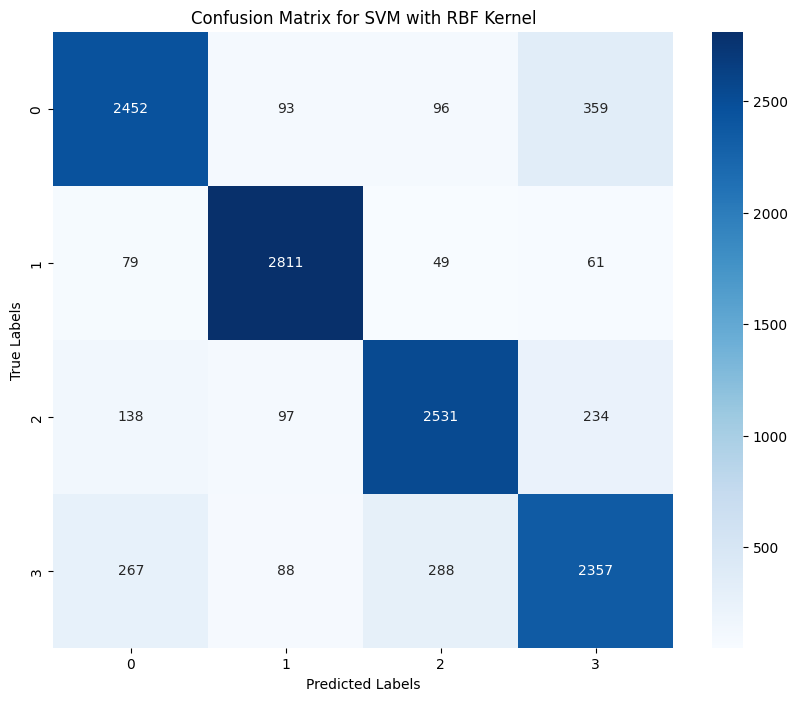

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Load the dataset
df = pd.read_csv('lstm.csv')

# 1. Prepare the data
X = df['Commentary'].astype(str).tolist()
y = df['PlayType_description'].values

# 2. Encode the target variable (y)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 3. Vectorize the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_tfidf = tfidf_vectorizer.fit_transform(X).toarray()

# 4. Split the dataset
X_train, X_temp, y_train, y_temp = train_test_split(X_tfidf, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# 5. Initialize and train the SVM Classifier with RBF kernel
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm_rbf.fit(X_train, y_train)

# 6. Evaluate on validation set
y_val_pred = svm_rbf.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.4f}")
print("\nValidation Classification Report:\n", classification_report(y_val, y_val_pred))

# 7. Evaluate on test set
y_test_pred = svm_rbf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Set Accuracy: {test_accuracy:.4f}")
print("\nTest Classification Report:\n", classification_report(y_test, y_test_pred))

# Plotting Confusion Matrix for Test Set
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for SVM with RBF Kernel")
plt.show()


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.initializers import Constant
from tqdm import tqdm
import matplotlib.pyplot as plt

# 1. Load the dataset
df = pd.read_csv('lstm.csv')
X = df['Commentary'].astype(str).tolist()
y = df['PlayType_description'].values

# 2. Encode the target variable (y)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 3. Tokenize the text data
vocab_size = 5000  # Limit the vocabulary size
tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(X)
X_sequences = tokenizer.texts_to_sequences(X)

# 5. Load pre-trained word embeddings (e.g., GloVe)
embedding_dim = 300  # Update this to match the dimensions of the GloVe file
embedding_index = {}
with open('glove.6B.300d.txt', 'r', encoding='utf-8') as f:  # Path to GloVe file
    for line in tqdm(f, desc="Loading embeddings"):
        values = line.split()
        word = values[0]
        vectors = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = vectors


# 6. Create an embedding matrix
word_index = tokenizer.word_index
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in word_index.items():
    if i < vocab_size:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

# 7. Split the dataset
X_train, X_temp, y_train, y_temp = train_test_split(X_padded, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# 8. Generate embeddings for input data using Embedding layer
embedding_layer = Embedding(input_dim=vocab_size,
                            output_dim=embedding_dim,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=max_length,
                            trainable=False)

# Transform the padded sequences into embeddings
X_train_emb = embedding_layer(X_train).numpy().mean(axis=1)  # Average over sequence length
X_val_emb = embedding_layer(X_val).numpy().mean(axis=1)
X_test_emb = embedding_layer(X_test).numpy().mean(axis=1)

# 9. Train the SVM model
svm_model = SVC(kernel='linear', C=1, gamma='scale', probability=True, random_state=42)
svm_model.fit(X_train_emb, y_train)

# 10. Evaluate the model
y_pred = svm_model.predict(X_test_emb)
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Test Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion matrix visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(ticks=np.arange(len(label_encoder.classes_)), labels=label_encoder.classes_, rotation=45)
plt.yticks(ticks=np.arange(len(label_encoder.classes_)), labels=label_encoder.classes_)
plt.tight_layout()
plt.show()


/var/folders/9q/ftjfwhn958sgctkd6pctp58h0000gn/T/ipykernel_1267/4162794626.py:16: DtypeWarning: Columns (3,15,24,47,49,50) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('lstm.csv')
Loading embeddings: 400000it [00:08, 46839.32it/s]


NameError: name 'X_padded' is not defined